In [1]:
#import packages
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Data/model-data/model_data.csv', index_col = 0)

#replace independent with ind. for better graphs
df.loc[df['Team Conference'] == 'Independent', 'Team Conference'] = 'Ind.'
df.loc[df['Opponent Conference'] == 'Indepedent', 'Opponent Conference'] = 'Ind.'

df.head(5)


,Team,Opponent,syn_date,Year,Team Win,Team Conference,Opponent Conference,Team Win_3_game_average,Team Earned YPPA_3_game_average,Team Earned YPRA_3_game_average,...,Opp Coaches Compensation,Opp Athletic Student Aid,Opp Total Revenues,"Opp Corporate Sponsorship, Advertising, Licensing",Opp Donor Contributions,Opp Competition Guarantees,Opp Ticket Sales,Opp Total Football Spending,Opp footall_expense_pct,Opp football_expense_pct
0,Akron,Ohio State,2011-09-01,2011,0,MAC,Big 10,NaN,NaN,NaN,...,16511360.0,15129920.0,131815821.0,12162905.0,17636938.0,3853330.0,50009395.0,44287914.0,0.362164,0.362164
1,Alabama,Kent State,2011-09-01,2011,1,SEC,MAC,NaN,NaN,NaN,...,3763340.0,5287795.0,21448821.0,424323.0,435339.0,822050.0,669316.0,11774328.0,0.567253,0.567253
2,Arkansas State,Illinois,2011-09-01,2011,0,Sun Belt,Big 10,NaN,NaN,NaN,...,10259368.0,9847571.0,77863883.0,4553520.0,16437955.0,1376000.0,16533261.0,29526365.0,0.401846,0.401846
3,Army,Northern Illinois,2011-09-01,2011,0,Ind.,MAC,NaN,NaN,NaN,...,3593287.0,6810435.0,24148602.0,370107.0,1329546.0,1629150.0,864185.0,13076496.0,0.573691,0.573691
4,Auburn,Utah State,2011-09-01,2011,1,SEC,WAC,NaN,NaN,NaN,...,3887698.0,4389402.0,22777944.0,564983.0,1869811.0,831640.0,1965806.0,11704878.0,0.594142,0.594142


<BarContainer object of 28 artists>

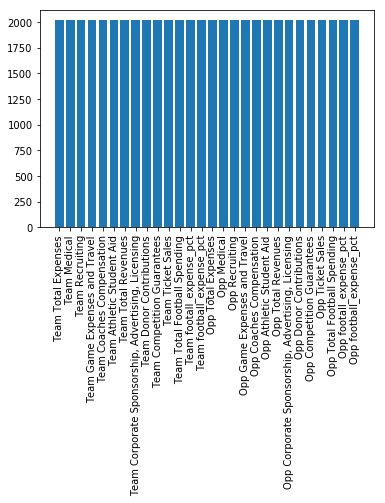

In [8]:
#visualize nulls for columns with more than 10% null values
pct = len(df) *0.1

nullVals = []
cols = []

for column in df.columns:
    val = df[column].isna().sum()
    if val >= pct:
        nullVals.append(val)
        cols.append(column)
    else:continue
        
plt.xticks(rotation=90)
plt.bar(cols, nullVals) 

<BarContainer object of 56 artists>

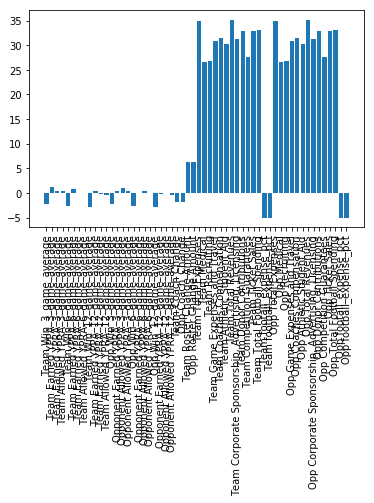

In [24]:
#plot variance of numeric columns 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = df.select_dtypes(include=numerics)

columns = []
variance = []

for column in numdf.columns:
    if column in ['Year', 'Team Win']:
        continue
    else:
        columns.append(column)
        variance.append(np.log(df[column].var(skipna = True)))
        
plt.xticks(rotation=90)       
plt.bar(columns, variance)

<BarContainer object of 24 artists>

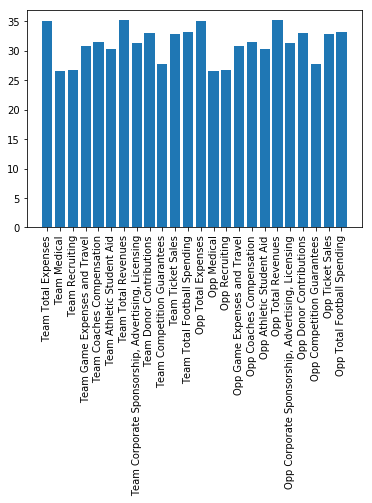

In [25]:
plt.clf()

#plot meaningful variances
#plot variance of numeric columns 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = df.select_dtypes(include=numerics)

columns = []
variance = []

for column in numdf.columns:
    if column in ['Year', 'Team Win']:
        continue
    elif np.log(df[column].var(skipna = True)) < 20:
        continue
    else:
        columns.append(column)
        variance.append(np.log(df[column].var(skipna = True)))
        
plt.xticks(rotation=90)       
plt.bar(columns, variance)

<BarContainer object of 56 artists>

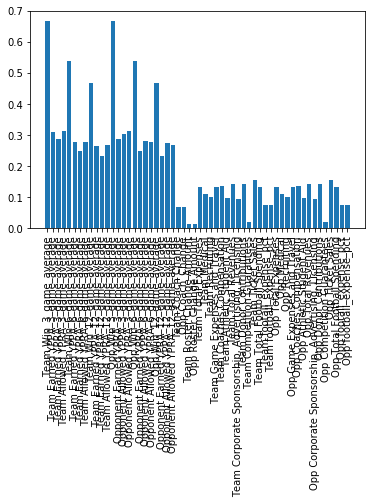

In [30]:
#Graph Correlation
plt.clf()

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = df.select_dtypes(include=numerics)

columns = []
correlation = []

for column in numdf.columns:
    if column in ['Year', 'Team Win']:
        continue
    else:
        columns.append(column)
        correlation.append(np.abs(df[column].corr(df['Team Win'])))
        
plt.xticks(rotation=90)       
plt.bar(columns, correlation)

In [ ]:
#show changes to variable over time
plt.clf()

years = df.Year.unique()

numerics = [col for col in numdf.columns if col not in ['Year', 'Team Win']]

aggs = {col:'mean' for col in numerics}

dfPlt = df.groupby('Year').\
           agg({'Team Win': ['sum','count']}).\
           reset_index()

#remove multi indexing
dfPlt.columns = list(map(''.join, dfPlt.columns.values))

#rename columns
dfPlt = dfPlt.rename(columns = {'Team Winsum': 'Total Wins', 'Team Wincount': 'Number of Games'})

#Win Pct column
dfPlt['Win Pct'] = dfPlt['Total Wins']/dfPlt['Number of Games']
dfPlt.sort_values(['Year', 'Win Pct'], ascending = False, inplace = True)

fig, ax = plt.subplots(len(years))

for year in years:
    #plot specific year
    dfPlt_filt = dfPlt[dfPlt.Year == year]
    
    
    plt.bar(x = dfPlt_filt['Team Conference'], height = dfPlt_filt['Win Pct'])
    
    #title
    plt.title('Winning Percentage by Each FBS Conference ' + str(year))
   
    #labels
    plt.xlabel('Conference')
    plt.ylabel('Winning Percentage')
    
    #make axis readable
    plt.xticks(rotation=45)

    plt.show()

In [53]:
#graph changes in variables over time
numerics = [col for col in numdf.columns if col not in ['Year', 'Team Win']]

aggs = {col:'mean' for col in numerics}

dfPlt = df.groupby('Year').\
           agg(aggs).\
           reset_index()

dfPlt2 = pd.melt(dfPlt, id_vars = 'Year', value_vars = numerics).\
            rename({'variable':'Variable', 'value':'YearMean'}, axis = 1)

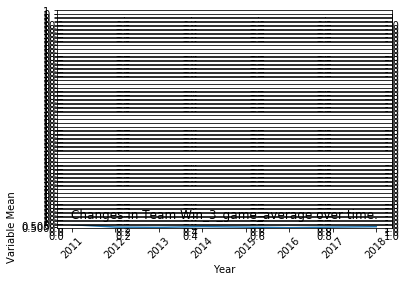

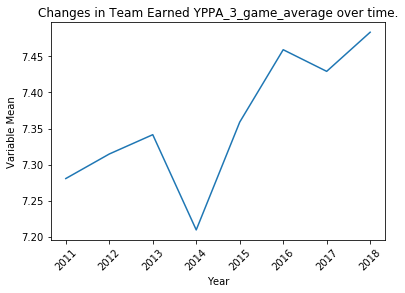

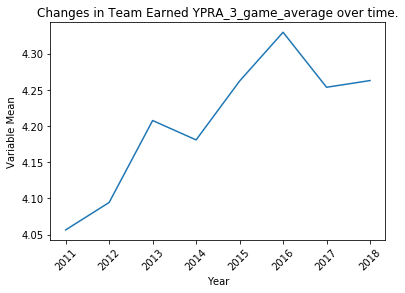

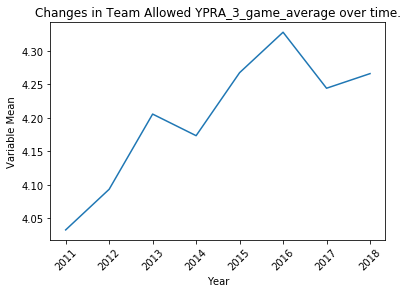

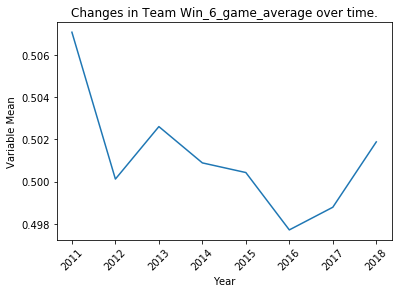

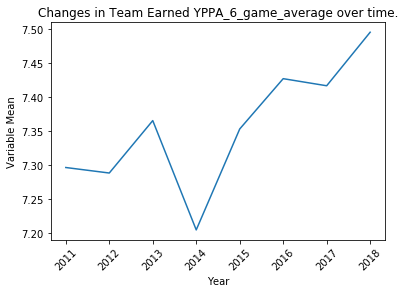

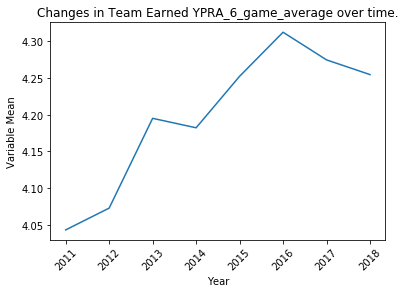

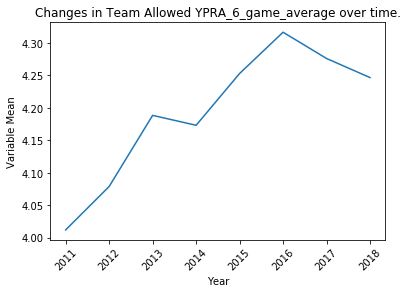

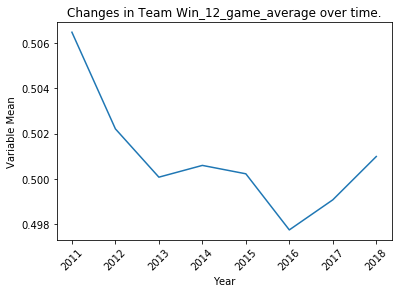

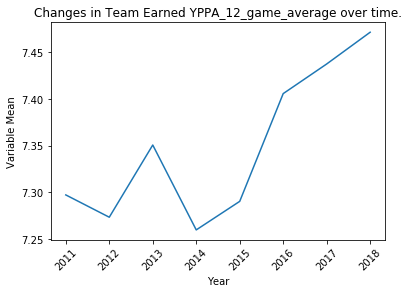

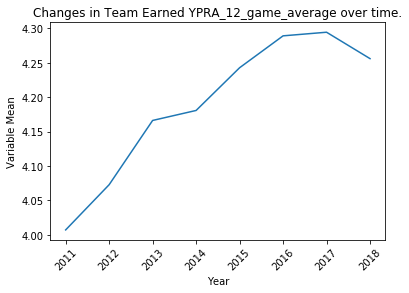

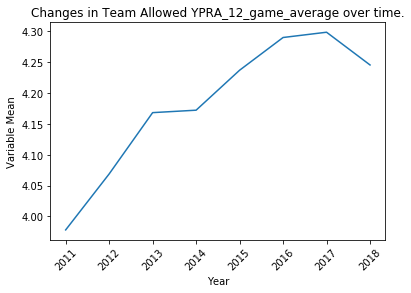

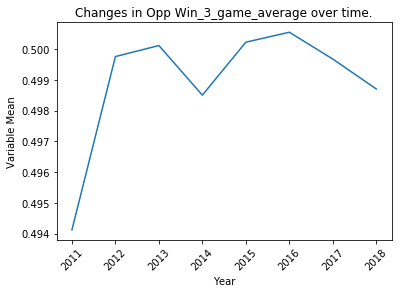

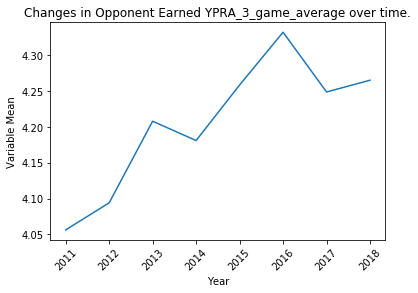

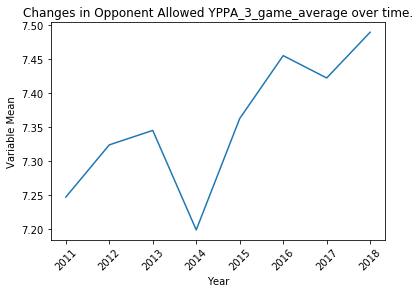

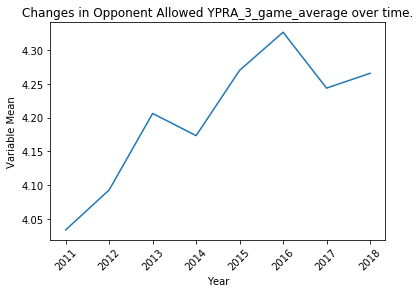

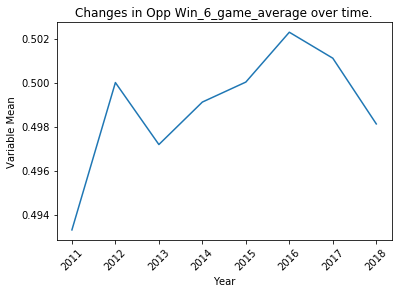

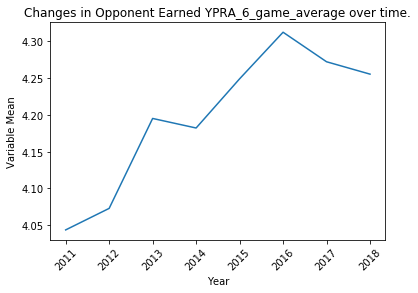

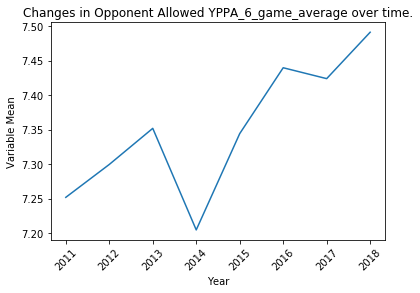

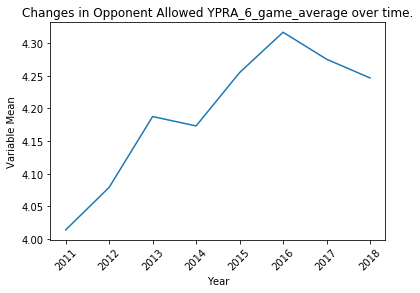

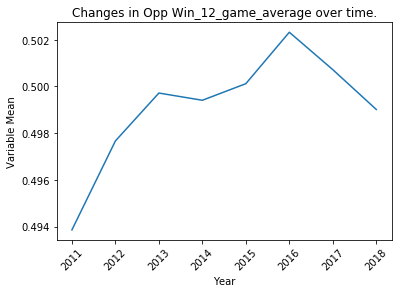

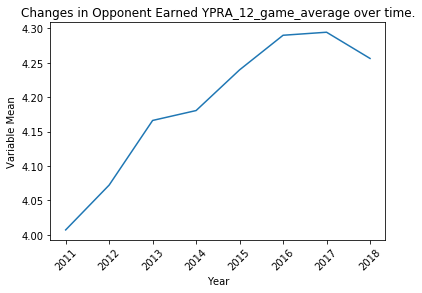

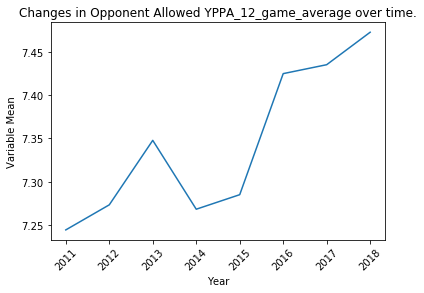

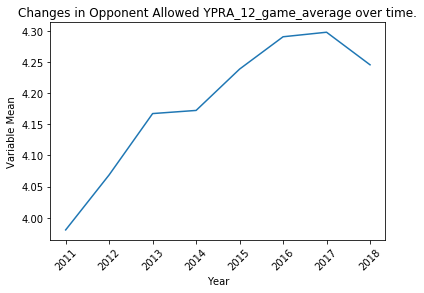

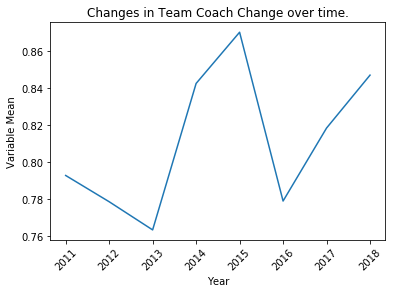

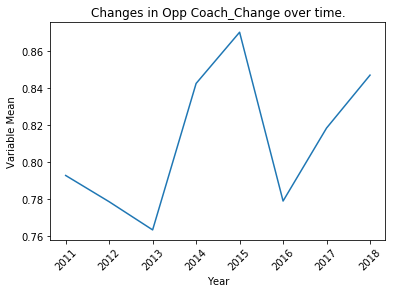

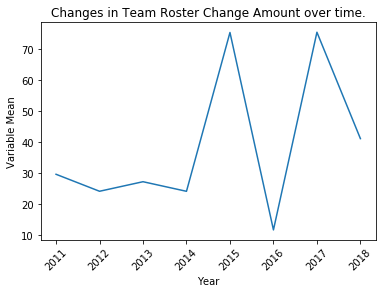

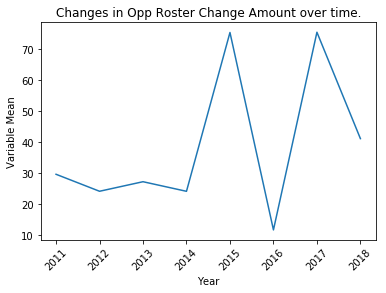

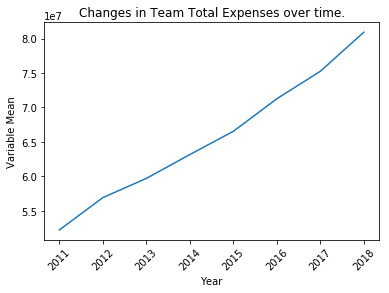

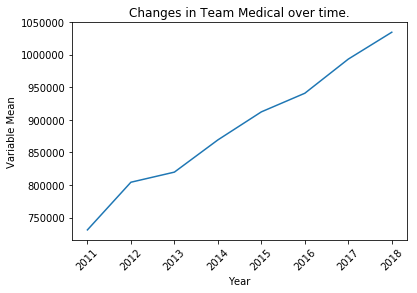

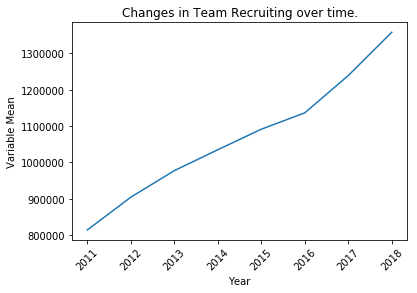

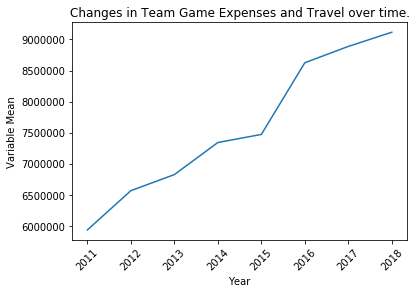

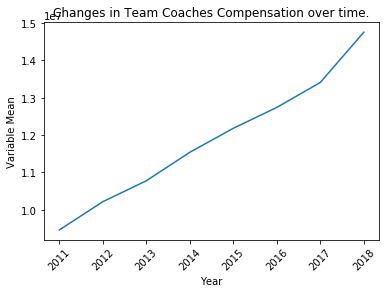

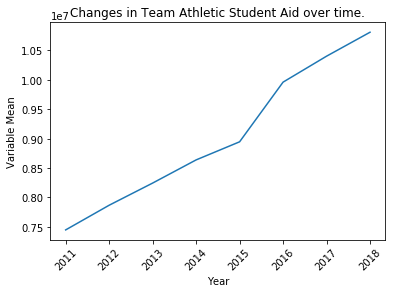

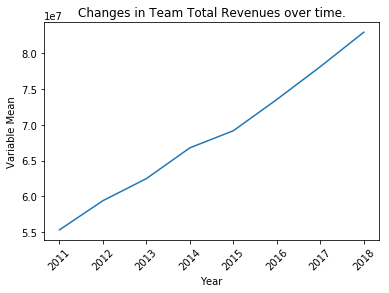

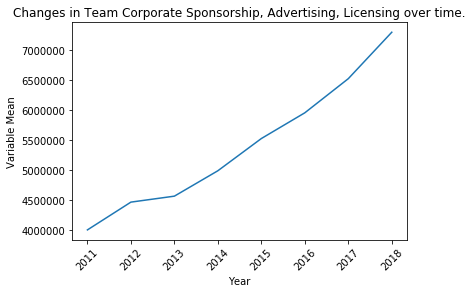

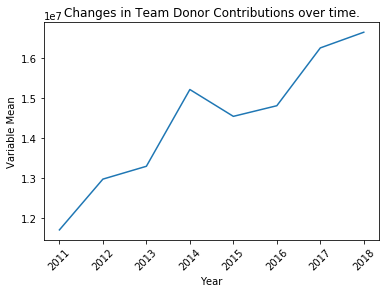

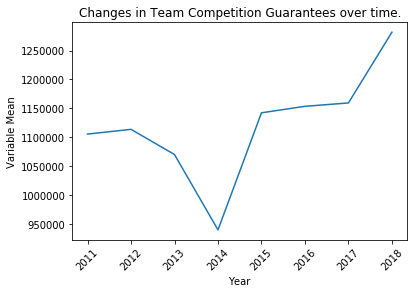

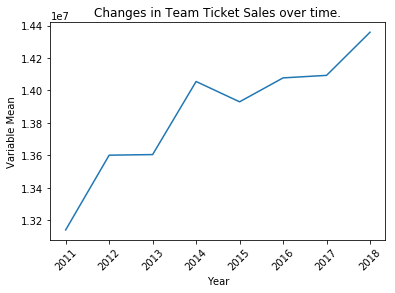

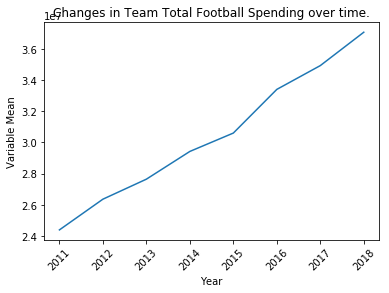

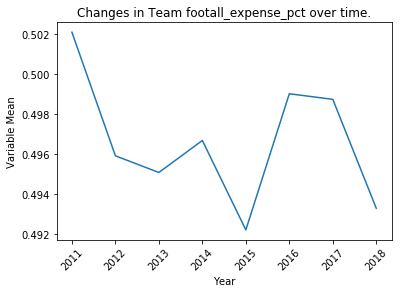

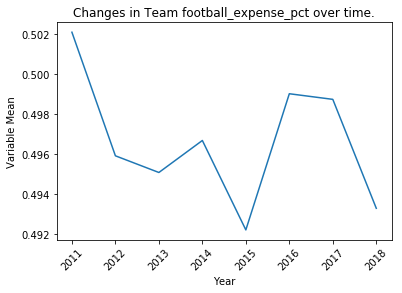

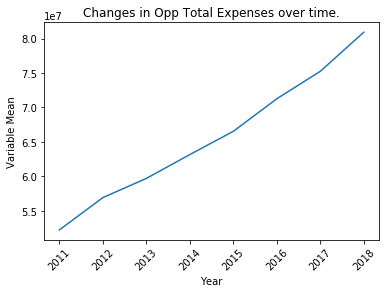

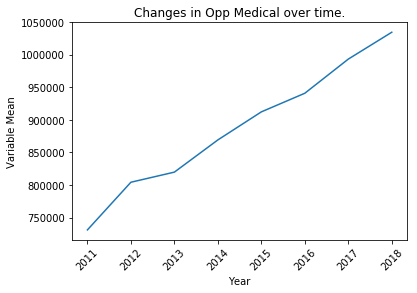

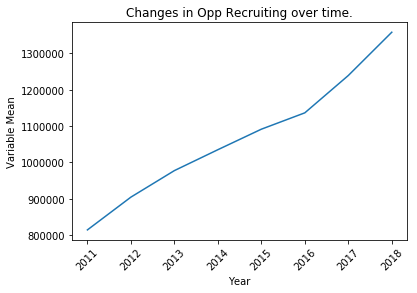

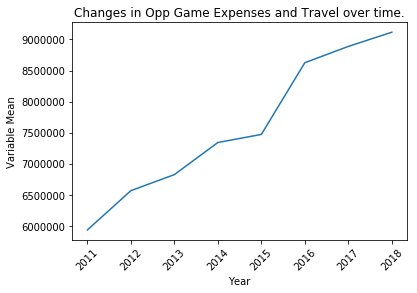

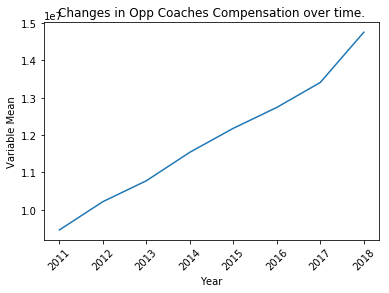

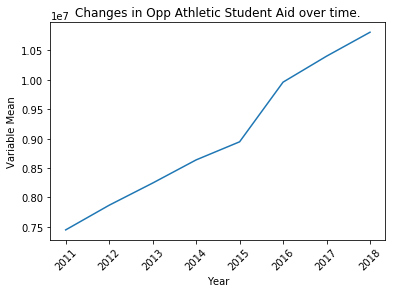

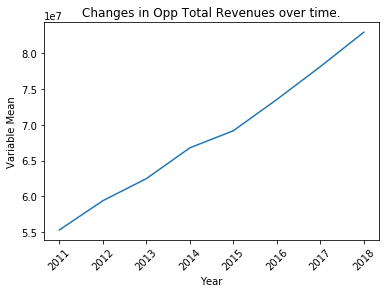

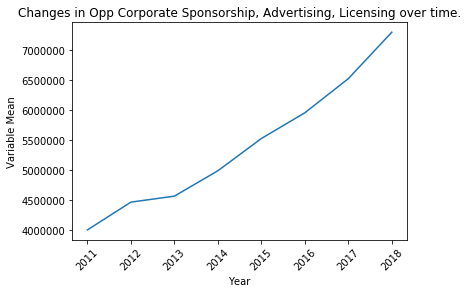

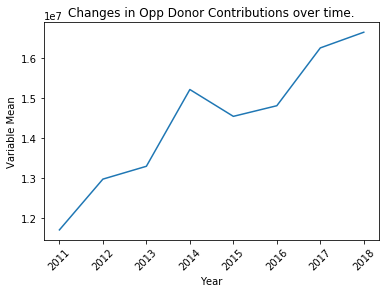

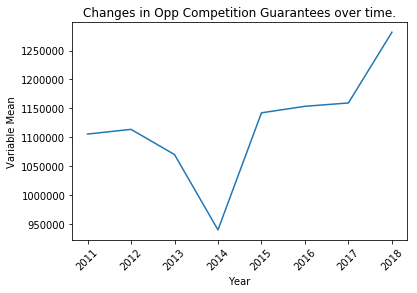

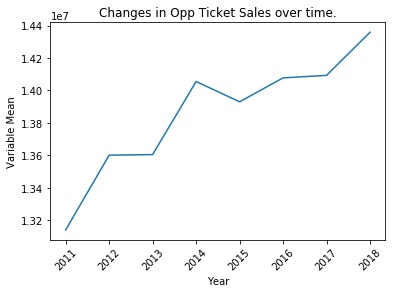

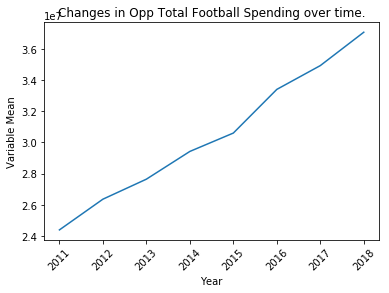

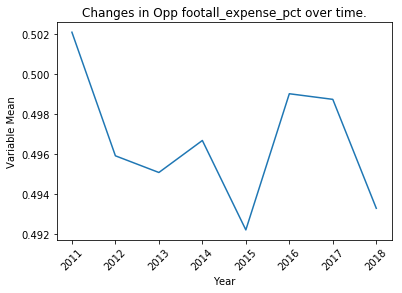

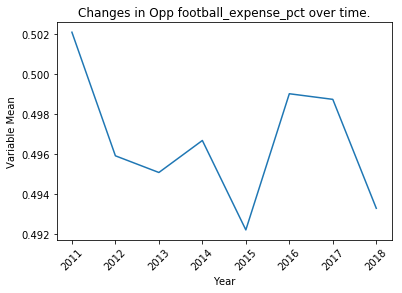

In [66]:


fig, ax = plt.subplots(len(numerics))

for var in dfPlt2.Variable.unique():
    #plot specific year
    dfPlt_filt = dfPlt2[dfPlt2.Variable == var]
    
    
    plt.plot(dfPlt_filt['Year'], dfPlt_filt['YearMean'])
    
    #title
    plt.title('Changes in ' + var + ' over time.')
   
    #labels
    plt.xlabel('Year')
    plt.ylabel('Variable Mean')
    
    #make axis readable
    plt.xticks(rotation=45)

    plt.show()

/Users/Broth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Broth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


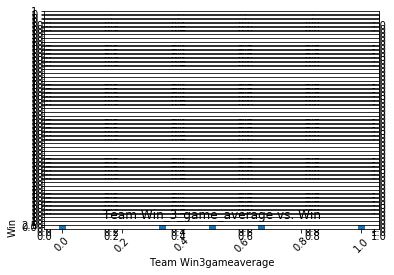

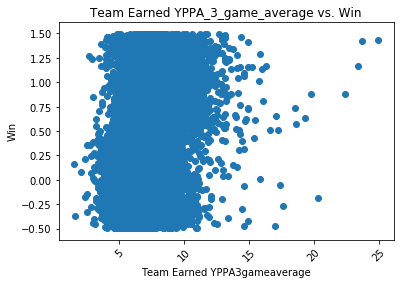

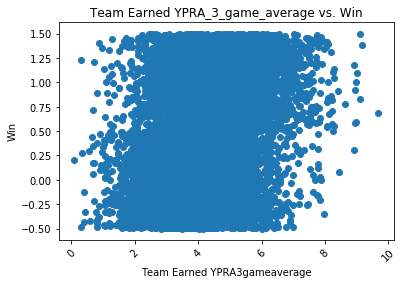

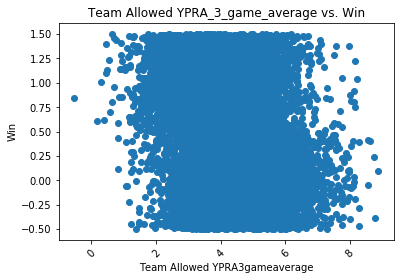

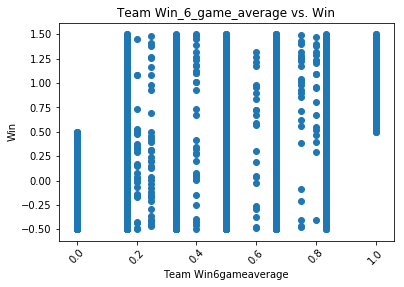

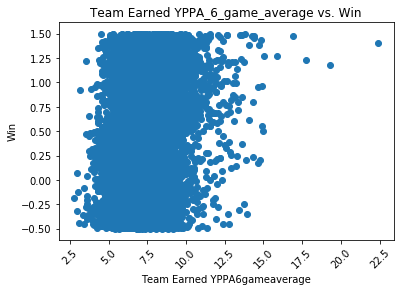

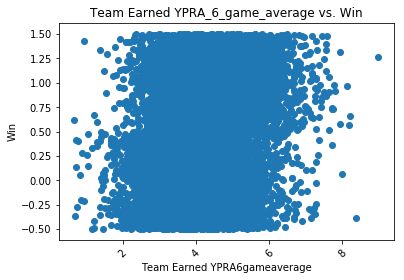

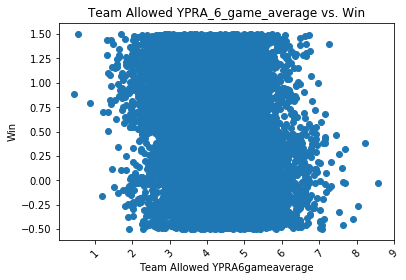

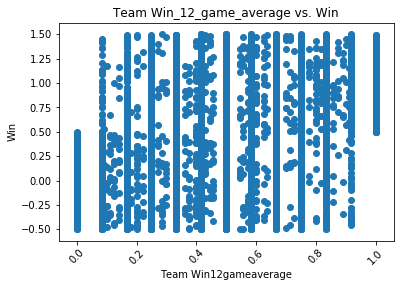

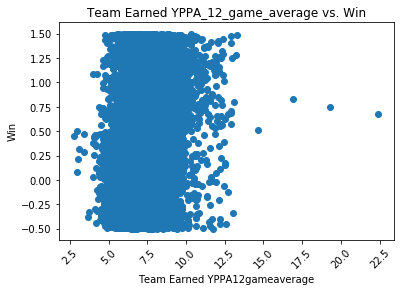

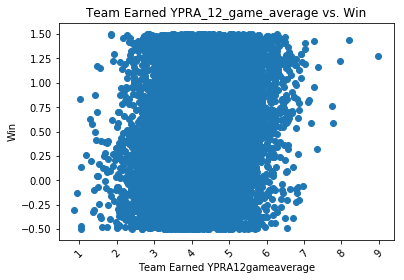

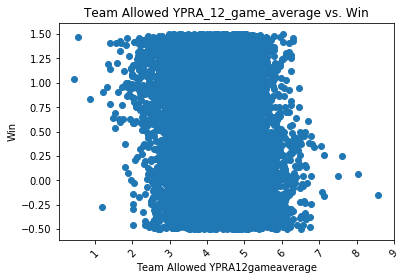

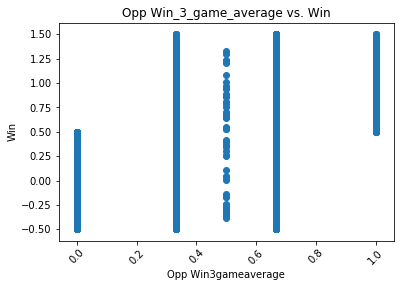

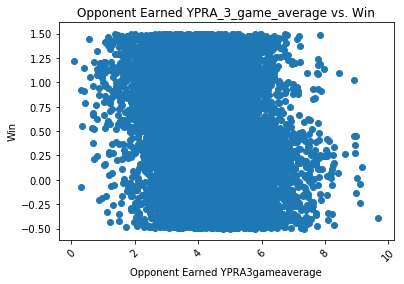

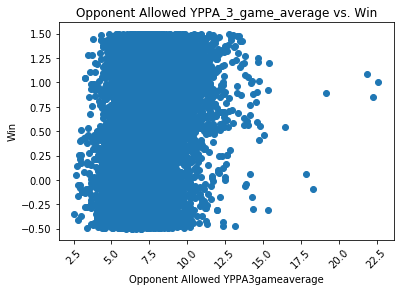

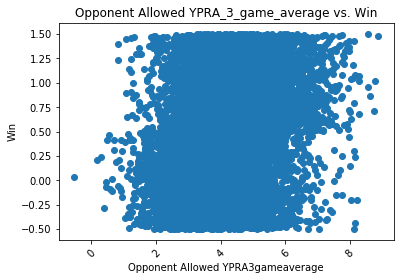

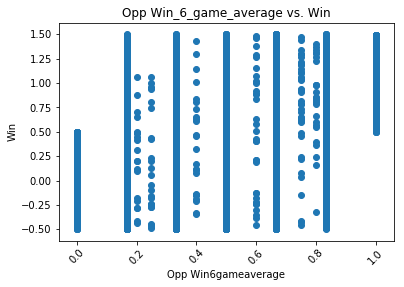

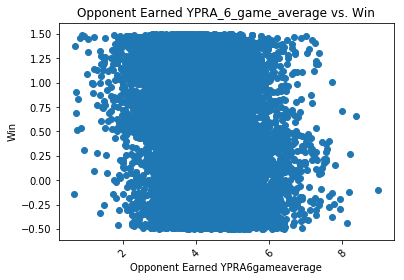

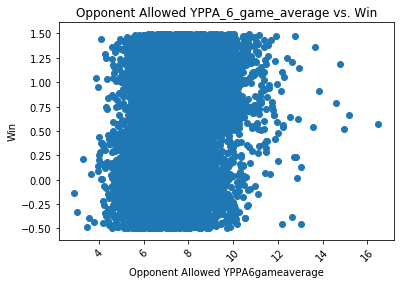

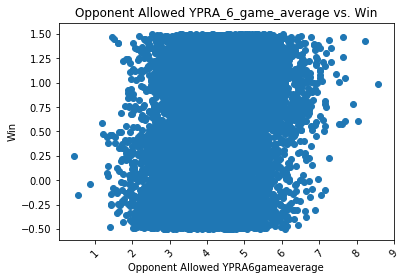

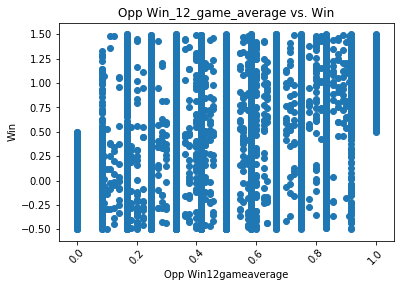

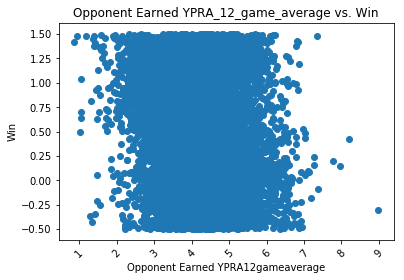

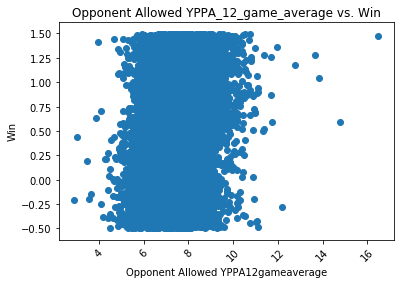

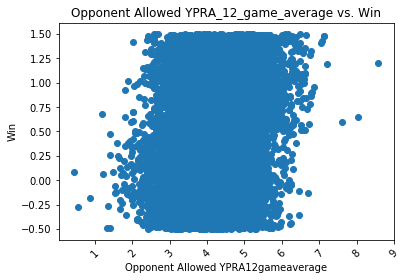

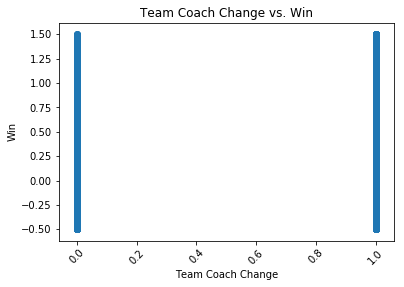

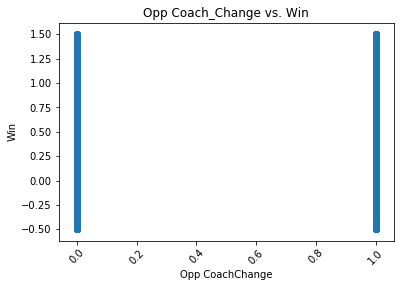

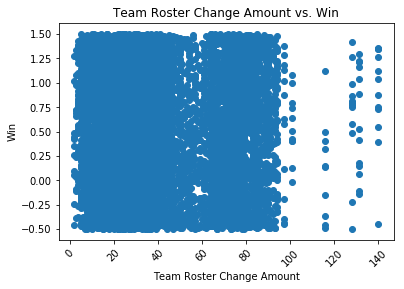

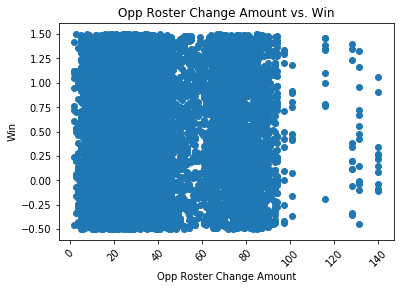

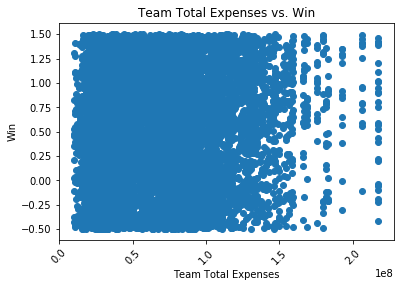

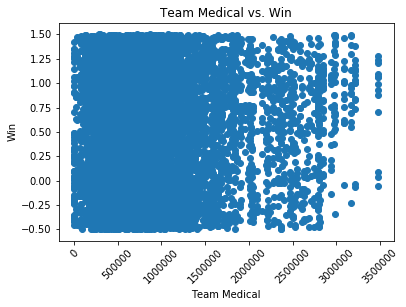

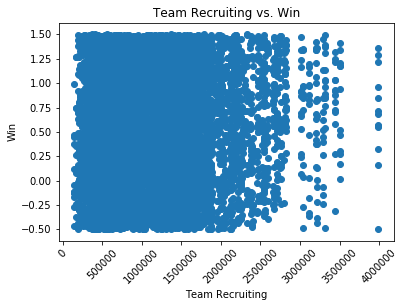

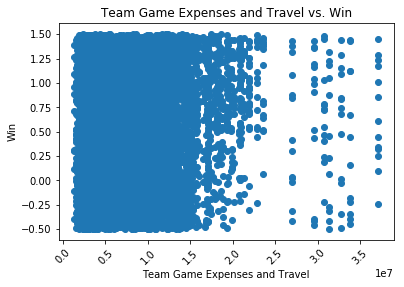

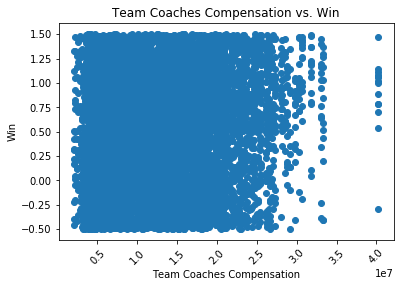

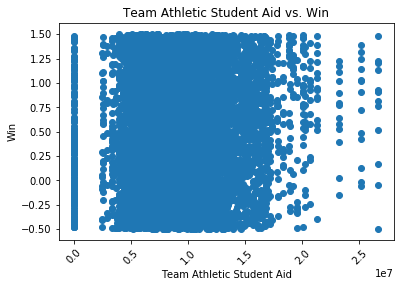

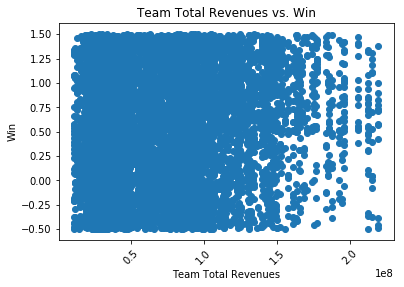

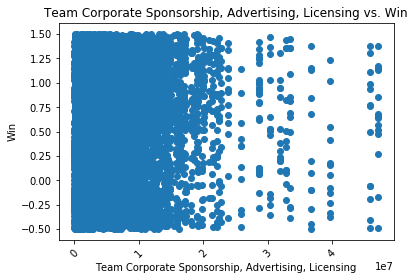

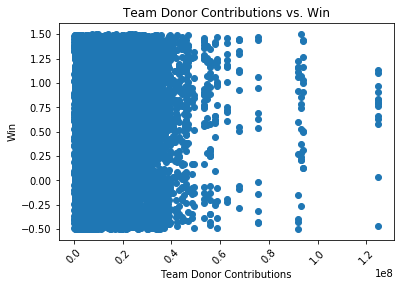

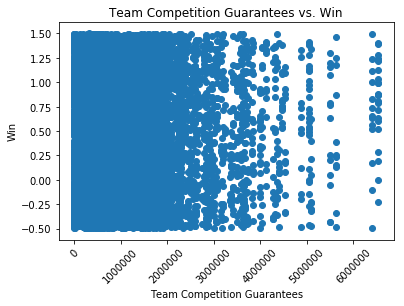

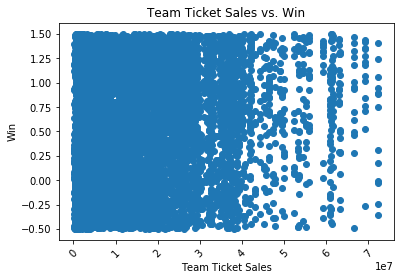

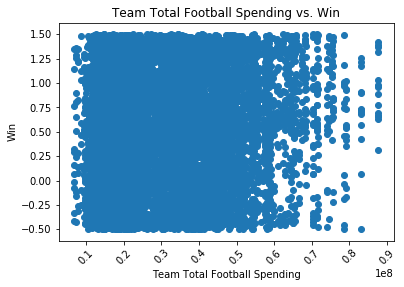

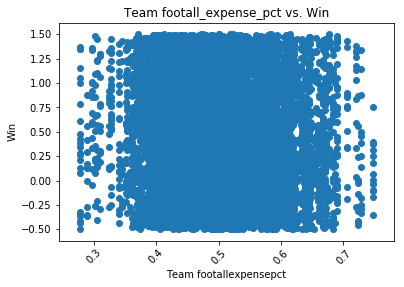

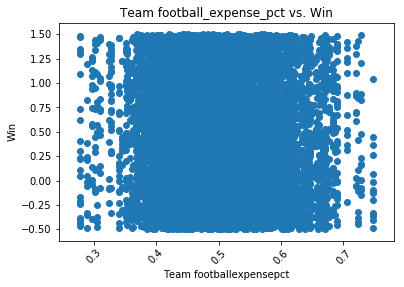

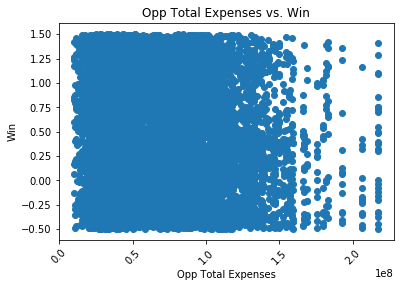

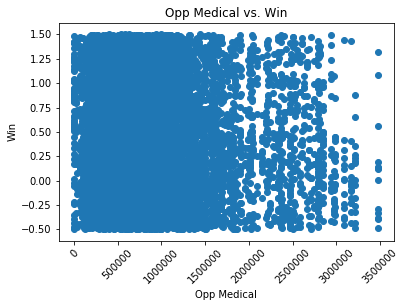

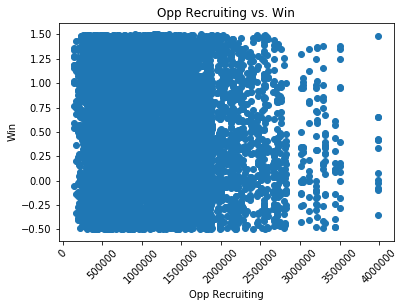

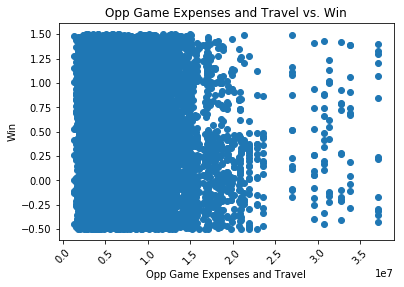

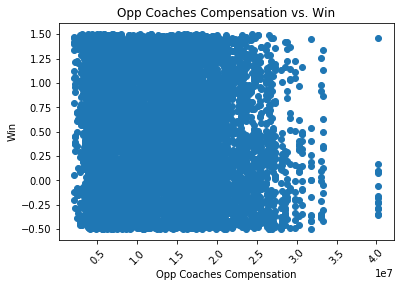

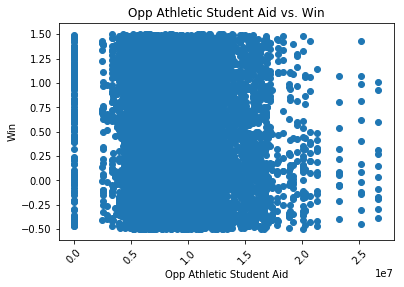

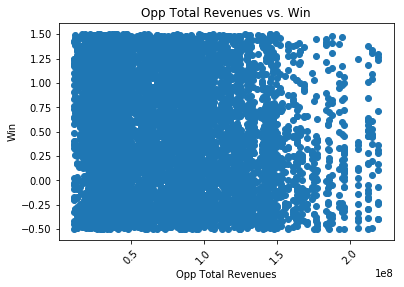

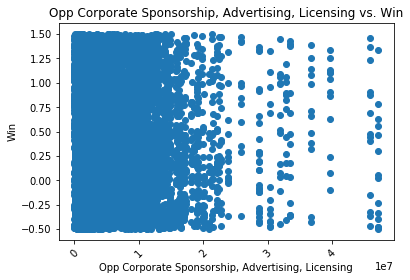

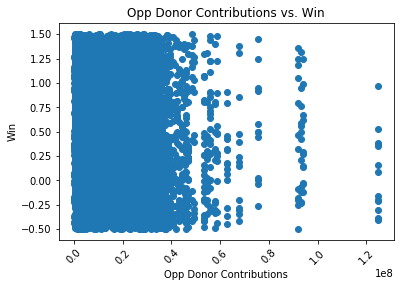

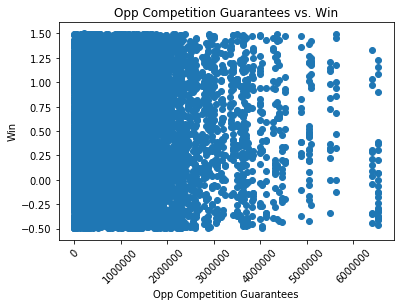

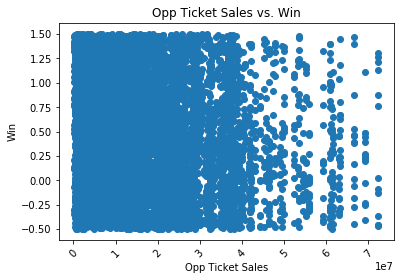

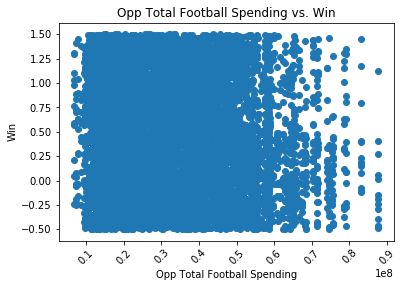

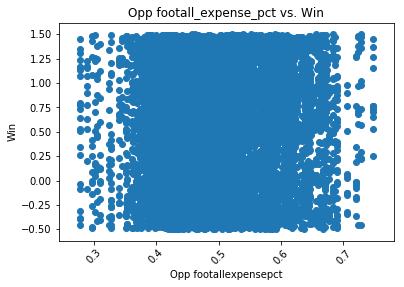

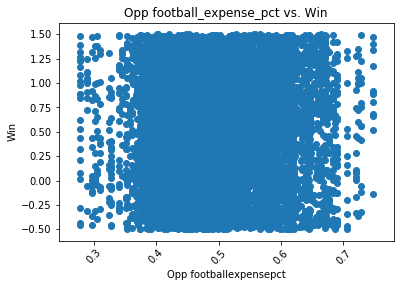

In [72]:
fig, ax = plt.subplots(len(numerics))

#visualize columns again win
for column in numerics:
    #create new plotting df
    dfPlt = df[['Team Win', column]]
    
    #create jitter for better visualization
    dfPlt['Team Win'] = dfPlt['Team Win'] + np.random.uniform(-0.5, 0.5, len(dfPlt))
    dfPlt[column] = dfPlt[column]
    
    #scatter plot
    plt.scatter(dfPlt[column], dfPlt['Team Win'])
    
    #add plot items
    #title
    plt.title(column + ' vs. Win')
   
    #labels
    plt.xlabel(column.replace('_', ''))
    plt.ylabel('Win')
    
    #make axis readable
    plt.xticks(rotation=45)

    plt.show()